# Data modeling

## Library import

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

## Data import

In [25]:
df_train = pd.read_parquet('../data/interim/df_log_data_baseline.parquet')
df_kaggle_test = pd.read_parquet('../data/interim/df_log_data_test_baseline.parquet')

## Data inspection

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   float64
 1   LotArea       1460 non-null   float64
 2   OverallQual   1460 non-null   float64
 3   OverallCond   1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   YearRemodAdd  1460 non-null   float64
 6   BsmtFinSF1    1460 non-null   float64
 7   BsmtFinSF2    1460 non-null   float64
 8   TotalBsmtSF   1460 non-null   float64
 9   2ndFlrSF      1460 non-null   float64
 10  LowQualFinSF  1460 non-null   float64
 11  GrLivArea     1460 non-null   float64
 12  BsmtFullBath  1460 non-null   float64
 13  BedroomAbvGr  1460 non-null   float64
 14  KitchenAbvGr  1460 non-null   float64
 15  TotRmsAbvGrd  1460 non-null   float64
 16  Fireplaces    1460 non-null   float64
 17  GarageCars    1460 non-null   float64
 18  GarageArea    1460 non-null 

There is no null data. The dataset is ready to use.

## Data split

In [9]:
X = df_train.drop(['SalePrice'], axis=1)

In [10]:
y = df_train['SalePrice']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Training the model

In [12]:
# columns_to_drop = [
#     'log_MasVnrArea',
#     'log_BsmtUnfSF', 
#     'log_1stFlrSF', 
#     'log_BsmtHalfBath', 
#     'log_GarageYrBlt', 
#     'log_OpenPorchSF', 
#     'log_3SsnPorch', 
#     'log_MiscVal', 
#     'log_MoSold', 
#     'log_EnclosedPorch',
#     'log_FullBath',
#     'log_HalfBath']

# X = X.drop(columns_to_drop, axis=1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [14]:
X_train_com_constante = sm.add_constant(X_train)

In [15]:
modelo_estatsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [16]:
modelo_estatsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     161.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:37:29   Log-Likelihood:                -14019.
No. Observations:                1168   AIC:                         2.809e+04
Df Residuals:                    1144   BIC:                         2.821e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.185e+06   1.38e+07     -0.304      0.761   -3.12e+07    2.28e+07
MSSubClass   -7599.1389   2484.284     -3.059      0.002   -1.25e+04   -2724.875
LotArea       1.843e+04   3010.457      6.121      0.000    1.25e+04    2.43e+04
OverallQual   7.211e+04   8179.746      8.815      0.000    5.61e+04    8.82e+04
OverallCond   1.726e+04   7085.228      2.436      0.015    3356.502    3.12e+04
YearBuilt     7.509e+05   1.33e+05      5.640      0.000     4.9e+05    1.01e+06
YearRemodAdd  3.435e+05   1.64e+05      2.100      0.036    2.25e+04    6.64e+05
BsmtFinSF1    2566.8209    445.184      5.766      0.000    1693.352    3440.290
BsmtFinSF2   -1528.3947    653.740     -2.338      0.020   -2811.058    -245.731
TotalBsmtSF    132.8112   1151.346      0.115      0.908   -2126.175    2391.797
2ndFlrSF     -1548.2443    617.331     -2.508      0.012   -2759.472    -337.016
LowQualFinSF -4921.6090   1717.268     -2.866      0.004   -8290.958   -1552.260
GrLivArea     1.096e+05   8762.659     12.509      0.000    9.24e+04    1.27e+05
BsmtFullBath -5.175e+04   1.97e+04     -2.628      0.009   -9.04e+04   -1.31e+04
BedroomAbvGr -5.078e+04   5529.777     -9.183      0.000   -6.16e+04   -3.99e+04
KitchenAbvGr -3.793e+04   1.05e+04     -3.622      0.000   -5.85e+04   -1.74e+04
TotRmsAbvGrd  4.403e+04   1.01e+04      4.360      0.000    2.42e+04    6.38e+04
Fireplaces    1.836e+04   6405.297      2.866      0.004    5793.141    3.09e+04
GarageCars    2.846e+04   4706.525      6.047      0.000    1.92e+04    3.77e+04
GarageArea   -3547.1116    997.165     -3.557      0.000   -5503.589   -1590.634
WoodDeckSF    1412.8530    496.558      2.845      0.005     438.586    2387.120
ScreenPorch   1169.4422    880.616      1.328      0.184    -558.360    2897.245
PoolArea      2636.7425   2658.587      0.992      0.322   -2579.511    7852.996
YrSold       -6.661e+05   1.81e+06     -0.368      0.713   -4.22e+06    2.88e+06
==============================================================================
Omnibus:                      622.866   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18292.211
Skew:                           1.882   Prob(JB):                         0.00
Kurtosis:                      22.018   Cond. No.                     2.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results graph analysis 

In [17]:
X_test_com_constante = sm.add_constant(X_test)

In [18]:
y_previsto_test = modelo_estatsmodels.predict(X_test_com_constante)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

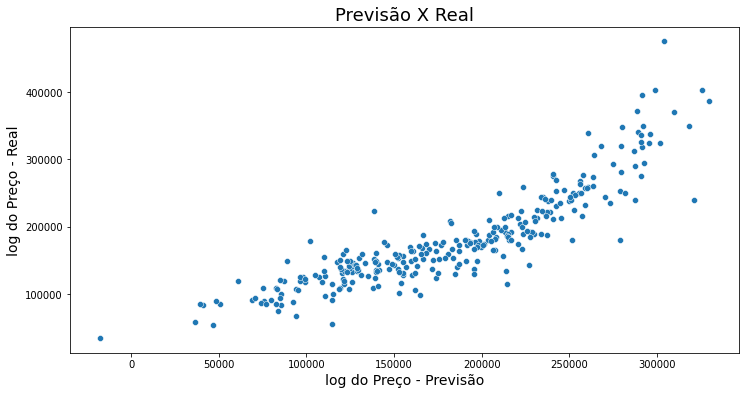

In [19]:
ax = sns.scatterplot(x=y_previsto_test, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Residual values

In [20]:
residuo = y_test - y_previsto_test

c:\Users\Marco De Amicis\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Density'>

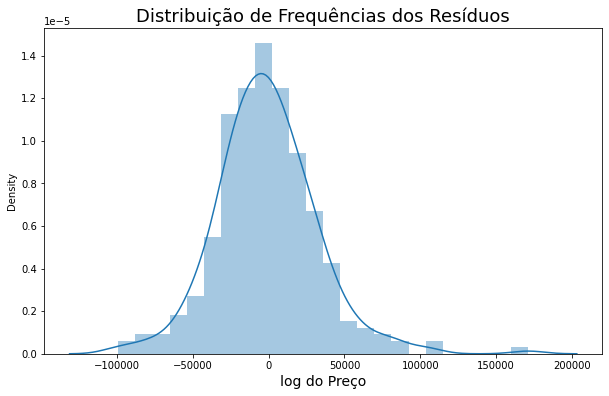

In [21]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

In [22]:
print(f"RMSE: {sm.tools.eval_measures.rmse(y_test, y_previsto_test, axis=0):.2f}")

RMSE: 33337.61


In [23]:
erro = pd.concat([y_test, y_previsto_test, np.exp(y_test), np.exp(y_previsto_test), ((np.exp(y_test) - np.exp(y_previsto_test)).round(2))**2], axis=1)
erro

c:\Users\Marco De Amicis\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SalePrice,0,SalePrice,1,2
Id,,,,,
813,55993,114757.941932,inf,inf,NaN
273,290000,287439.178930,inf,inf,NaN
295,167000,222939.905891,inf,inf,NaN
453,204000,221576.797366,inf,inf,NaN
1003,232000,259177.510373,inf,inf,NaN
...,...,...,...,...,...
233,94500,70537.643946,inf,inf,NaN
1249,129500,195815.350462,inf,inf,NaN
882,187500,237241.283807,inf,inf,NaN


In [24]:
(erro[2].sum()/len(erro))**0.5

inf

In [29]:
X_kaggle_test_com_constante = sm.add_constant(df_kaggle_test)

y_previsto_kaggle_test = modelo_estatsmodels.predict(X_kaggle_test_com_constante)

pd.DataFrame(y_previsto_kaggle_test, columns=['SalePrice']).to_csv('../data/processed/first_output.csv')